In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



Processed Data for Customer Churn:
Number of duplicate rows: 0
Dropped columns: ['LoyaltyID', 'Customer ID']
Handled missing values.
No outliers detected in any numeric columns.
No outliers detected in any numeric columns.
Descriptive Statistics:
            Tenure  Monthly Charges  Total Charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2283.300441
std      24.559481        30.090047    2265.000258
min       0.000000        18.250000      18.800000
25%       9.000000        35.500000     402.225000
50%      29.000000        70.350000    1400.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

Histograms:


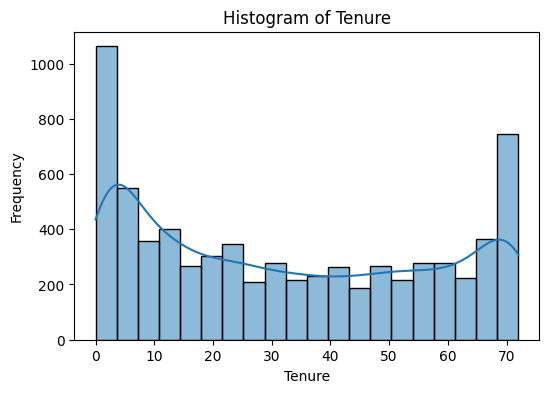

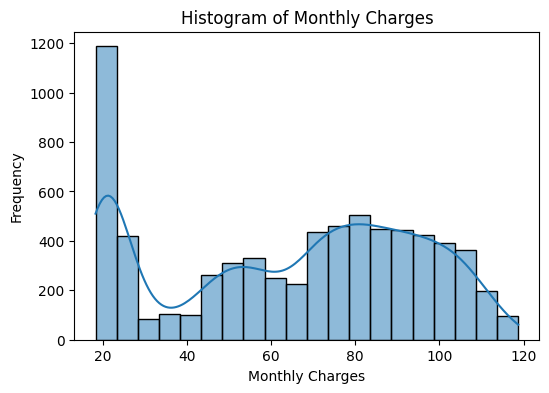

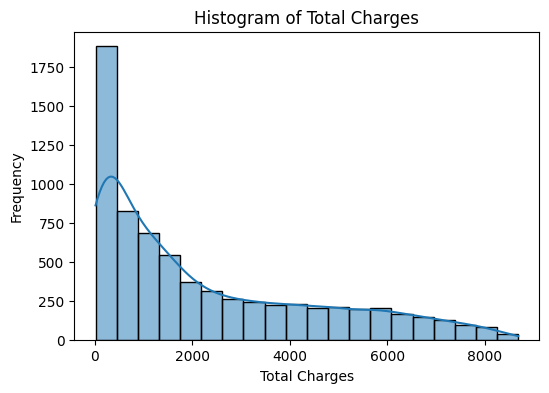


Bar Charts:


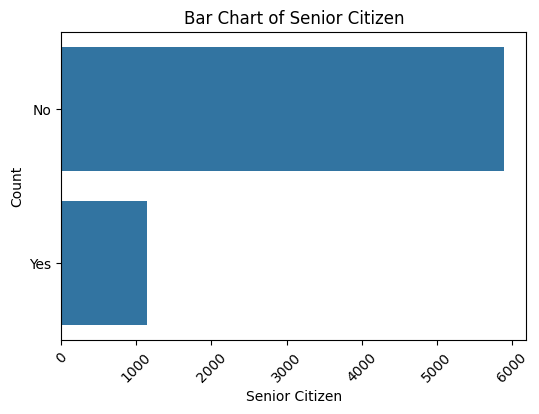

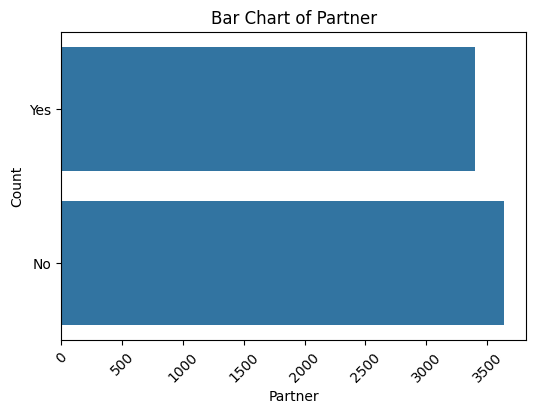

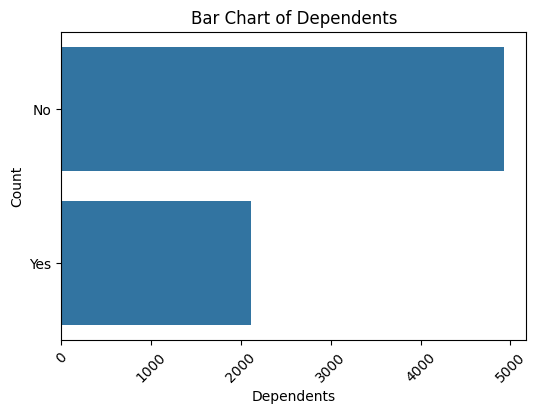

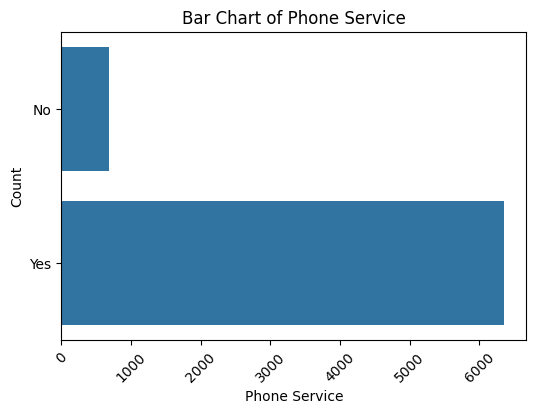

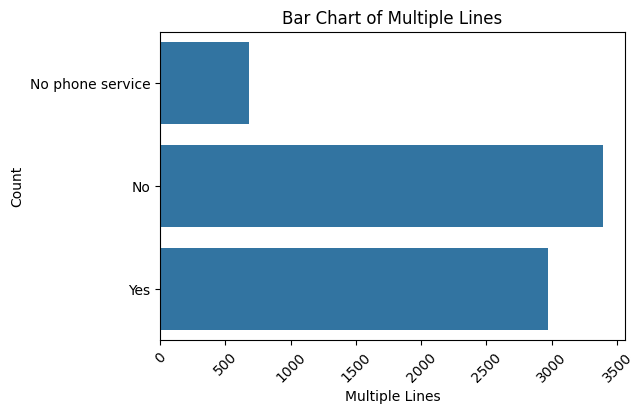

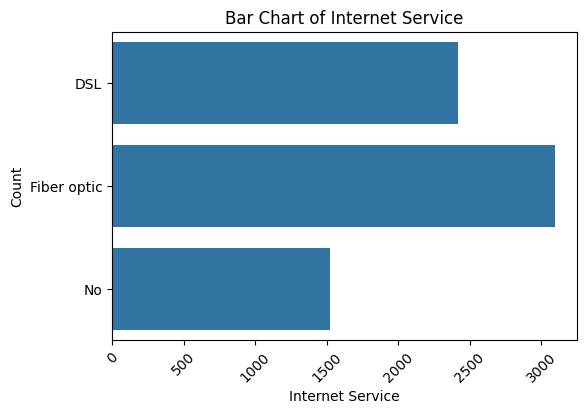

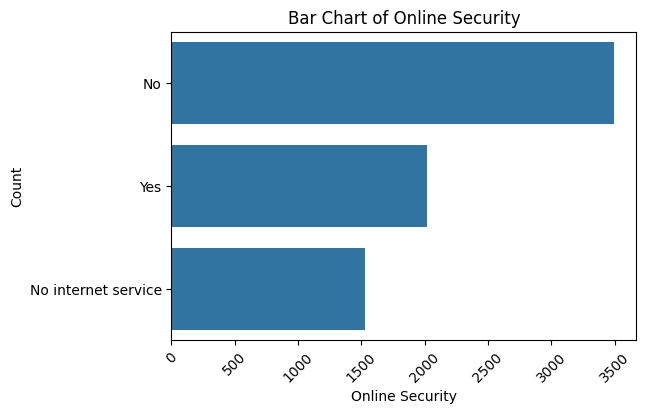

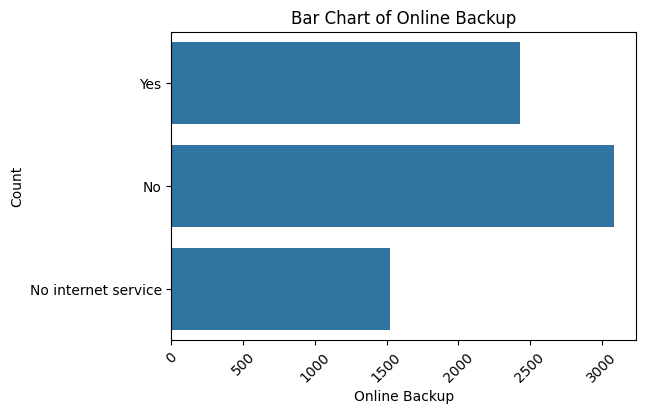

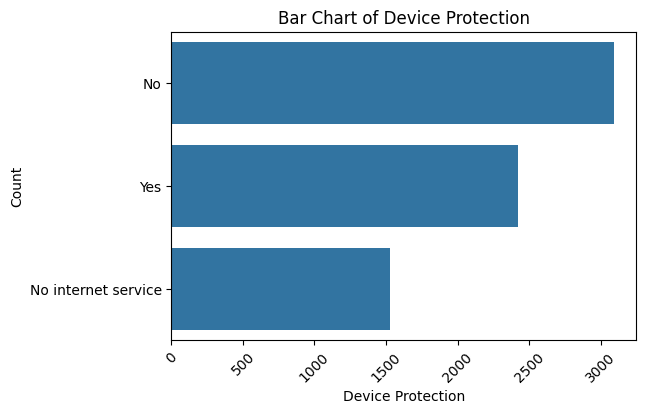

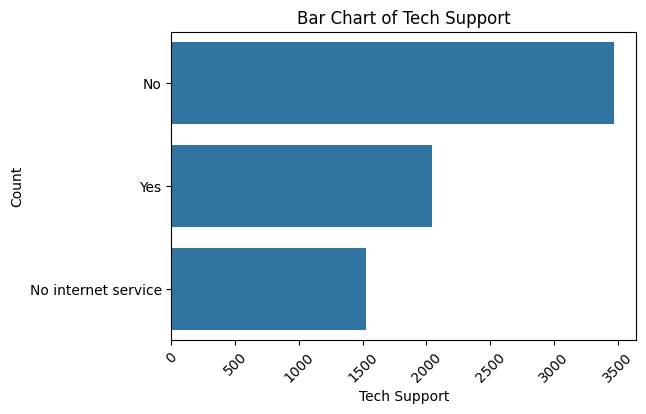

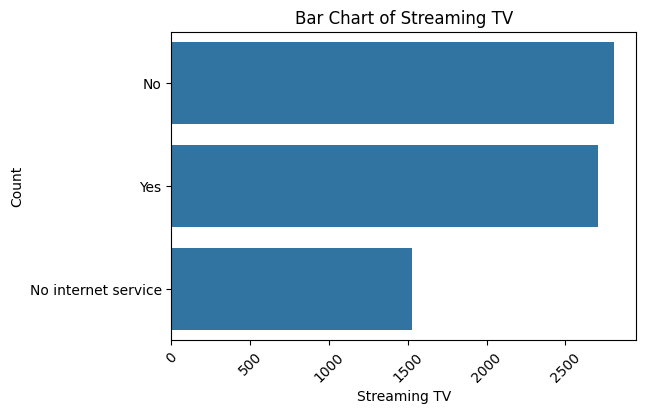

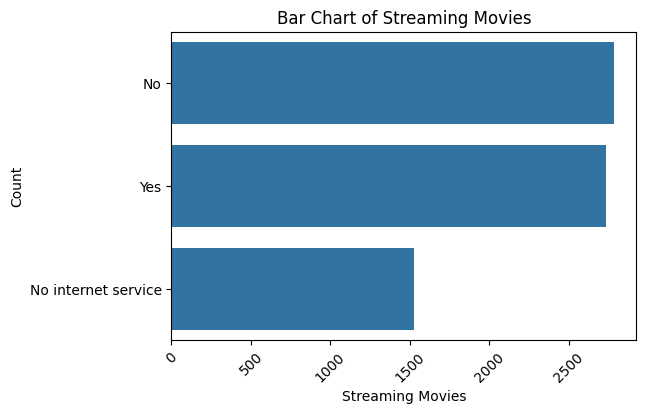

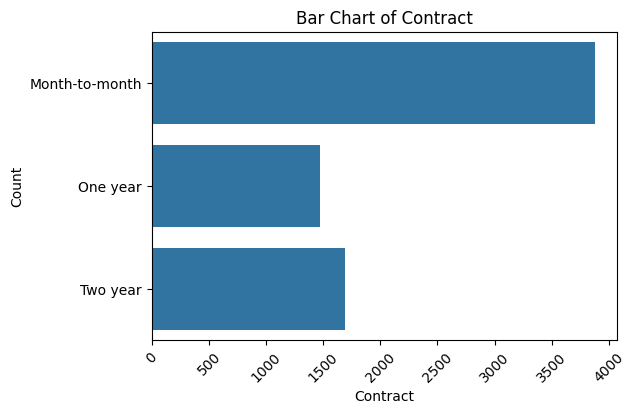

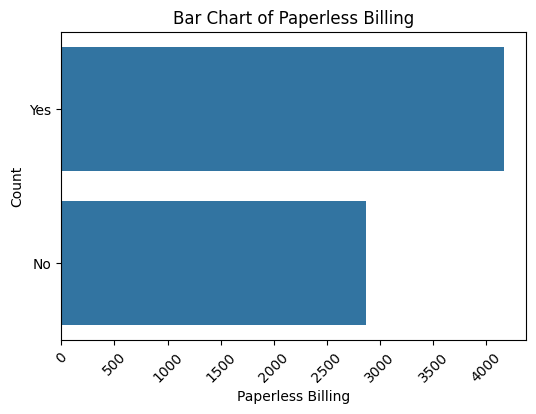

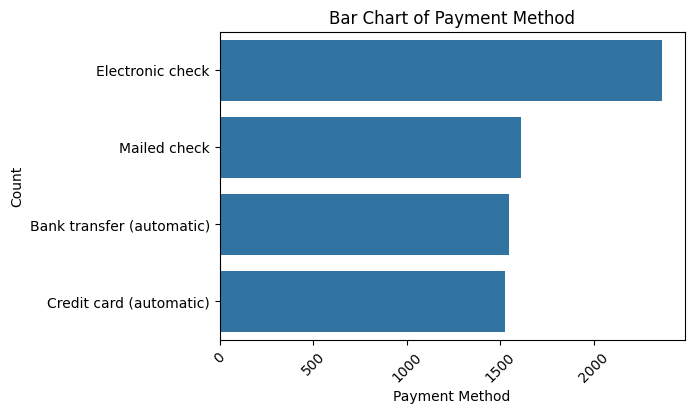

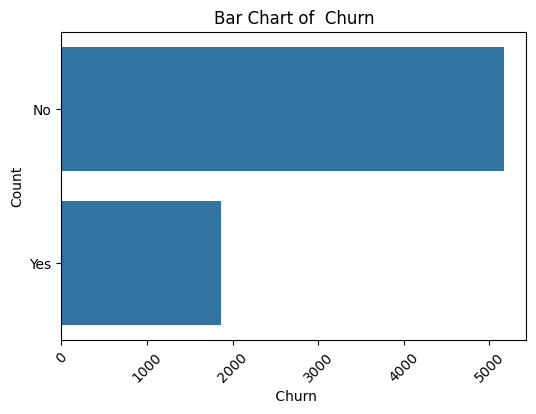


Box Plots:


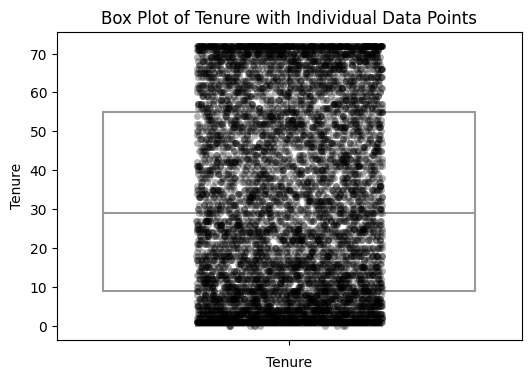

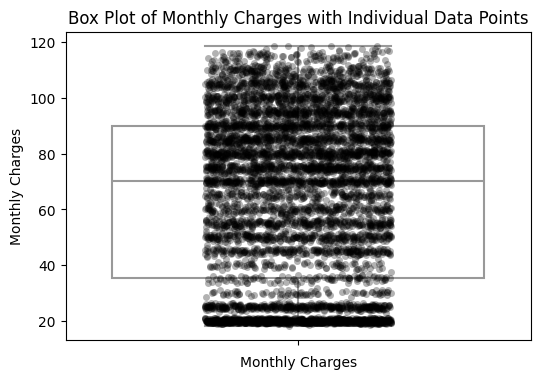

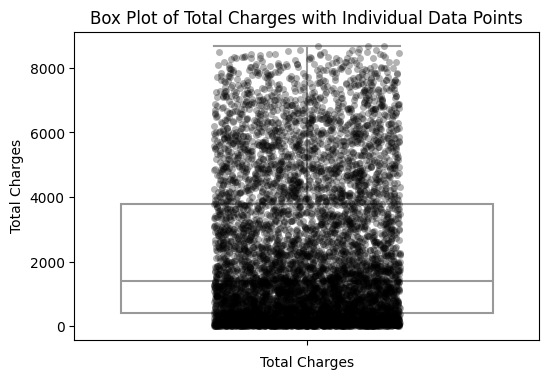

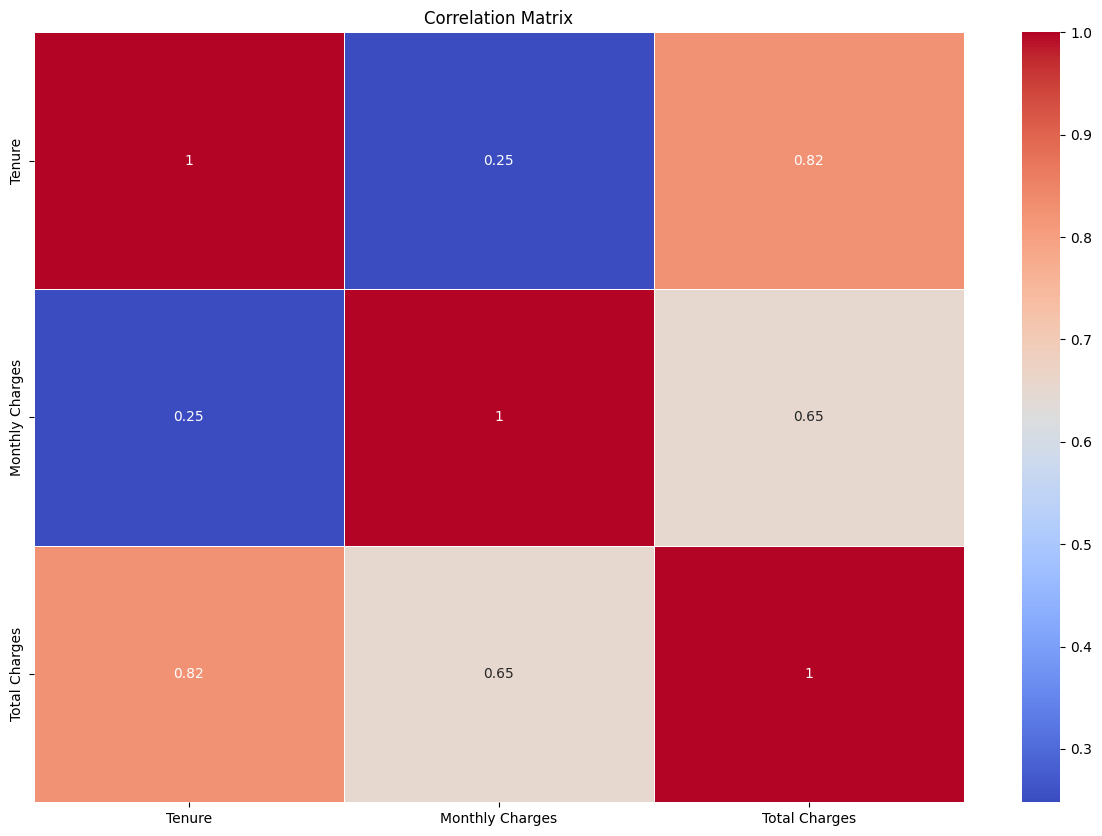

  Senior Citizen Partner Dependents  Tenure Phone Service    Multiple Lines  \
0             No     Yes         No       1            No  No phone service   
1             No      No         No      34           Yes                No   
2             No      No         No       2           Yes                No   
3             No      No         No      45            No  No phone service   
4             No      No         No       2           Yes                No   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL              No           Yes                No   
1              DSL             Yes            No               Yes   
2              DSL             Yes           Yes                No   
3              DSL             Yes            No               Yes   
4      Fiber optic              No            No                No   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No             

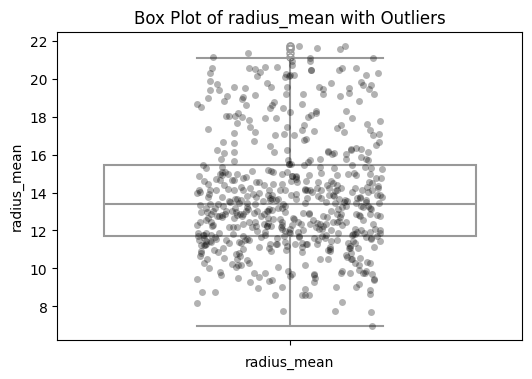

Outliers detected in texture_mean.


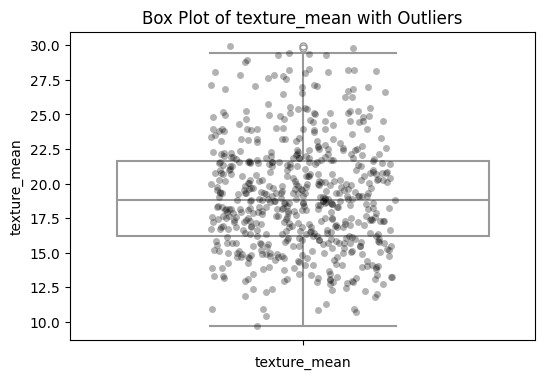

Outliers detected in perimeter_mean.


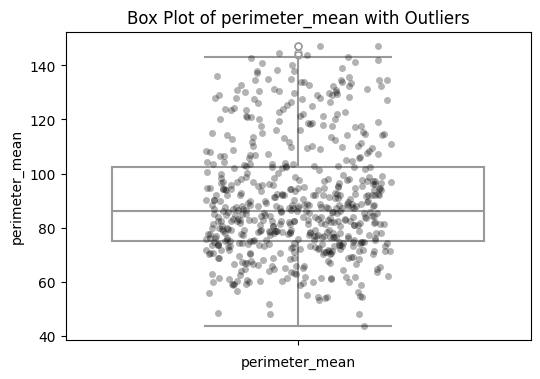

Outliers detected in area_mean.


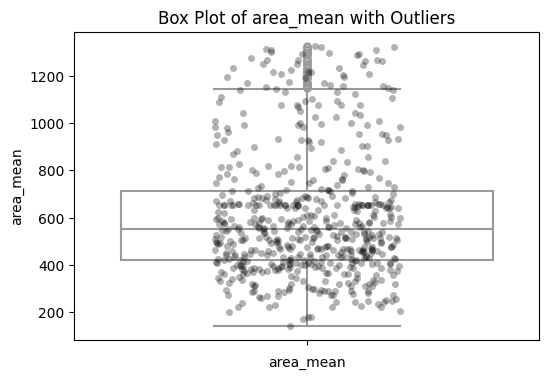

Outliers detected in smoothness_mean.


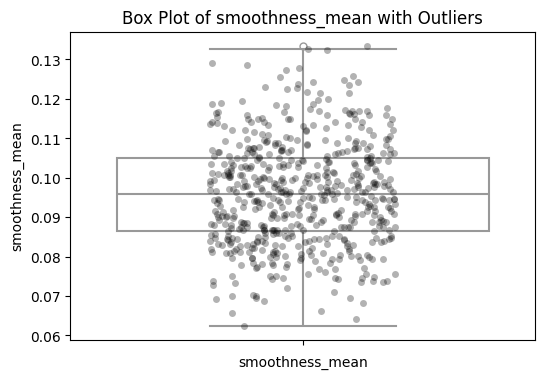

Outliers detected in compactness_mean.


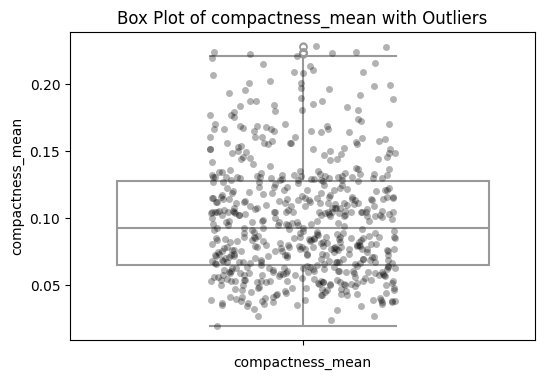

Outliers detected in concavity_mean.


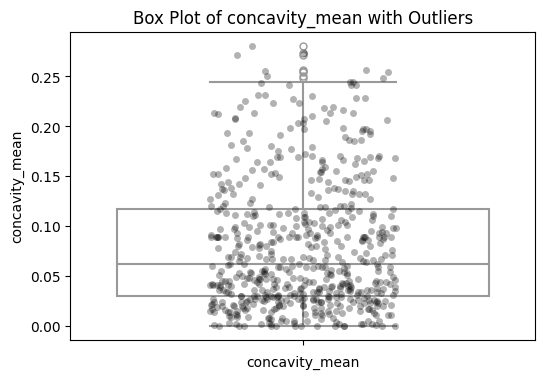

Outliers detected in concave points_mean.


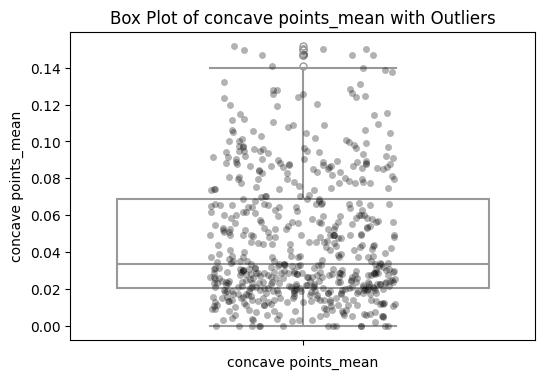

Outliers detected in symmetry_mean.


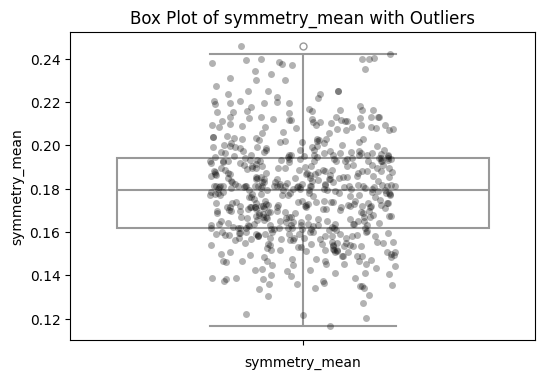

Outliers detected in fractal_dimension_mean.


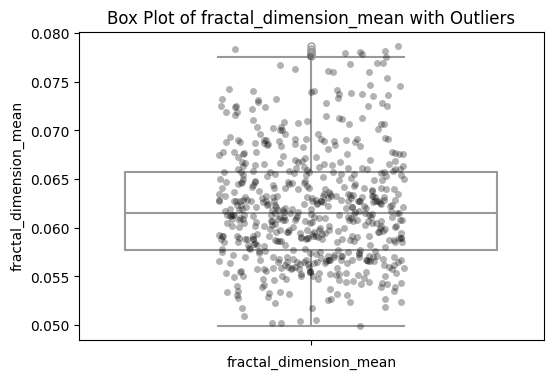

Outliers detected in radius_se.


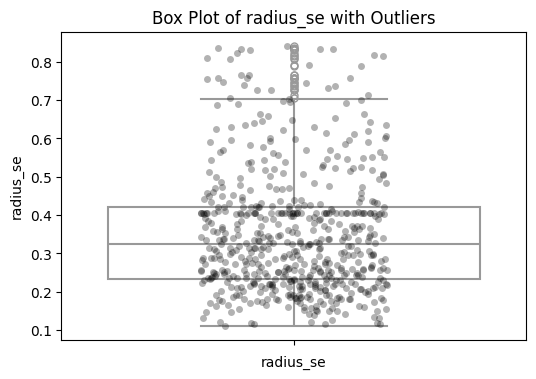

Outliers detected in texture_se.


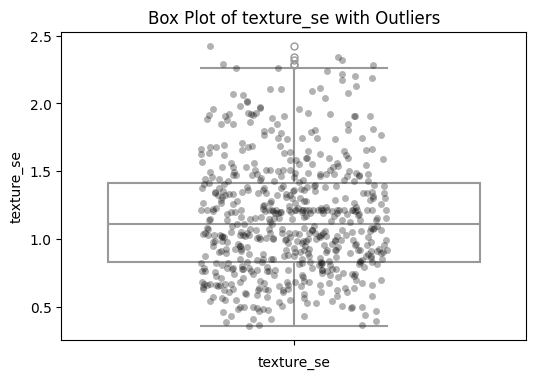

Outliers detected in perimeter_se.


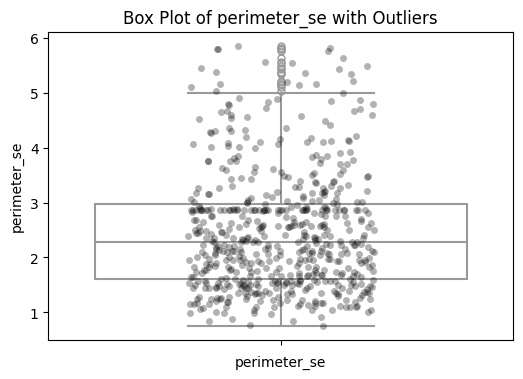

Outliers detected in area_se.


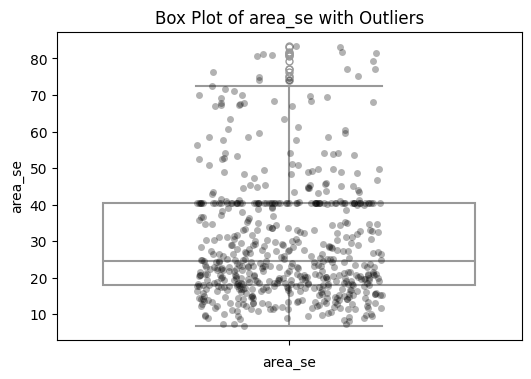

Outliers detected in smoothness_se.


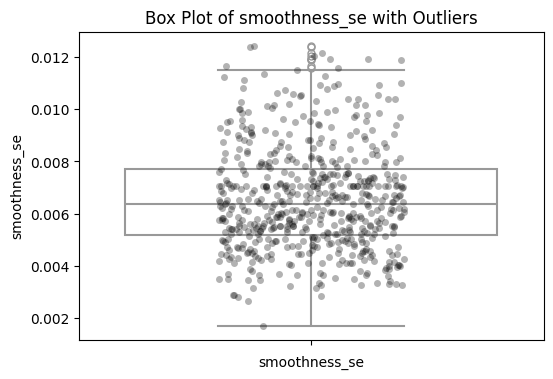

Outliers detected in compactness_se.


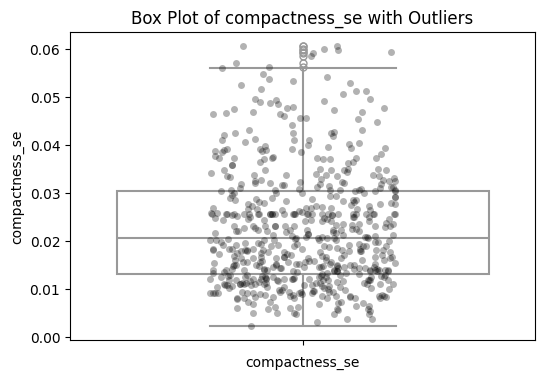

Outliers detected in concavity_se.


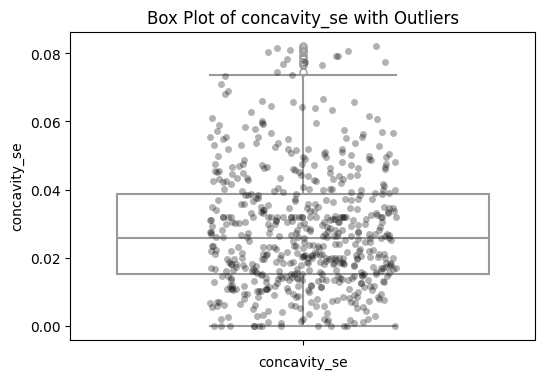

Outliers detected in concave points_se.


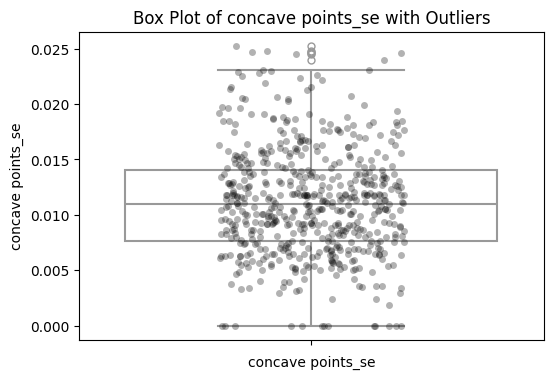

Outliers detected in symmetry_se.


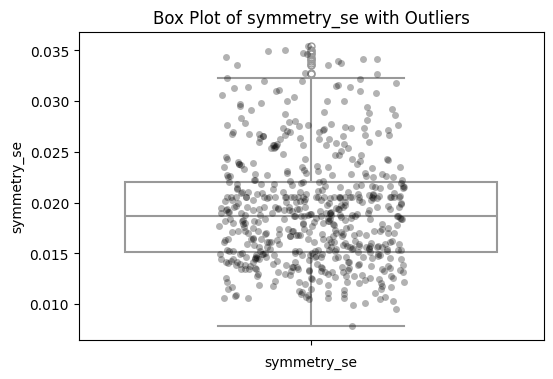

Outliers detected in fractal_dimension_se.


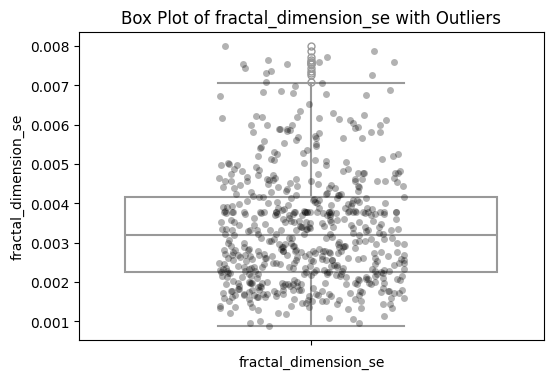

Outliers detected in radius_worst.


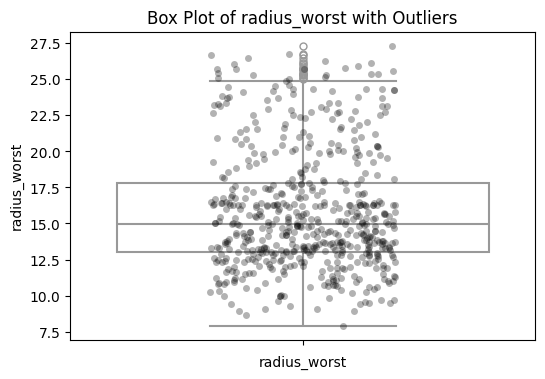

Outliers detected in texture_worst.


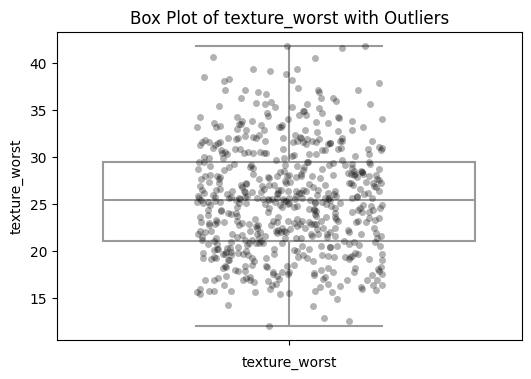

Outliers detected in perimeter_worst.


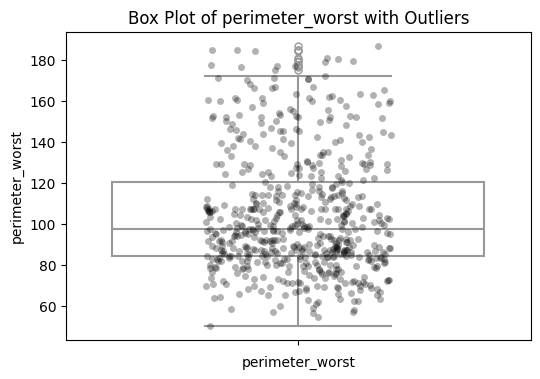

Outliers detected in area_worst.


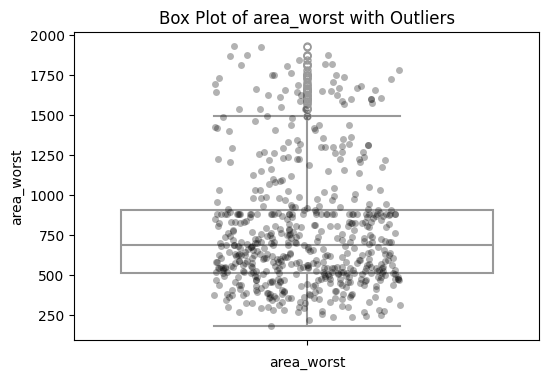

Outliers detected in smoothness_worst.


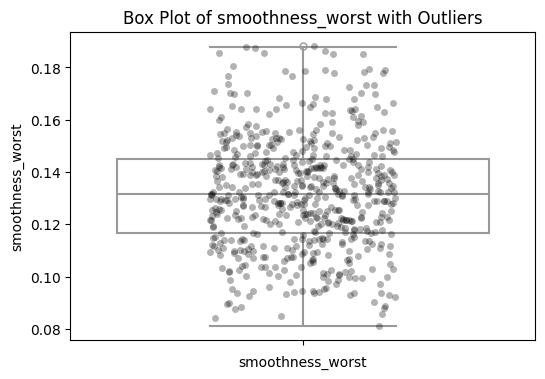

Outliers detected in compactness_worst.


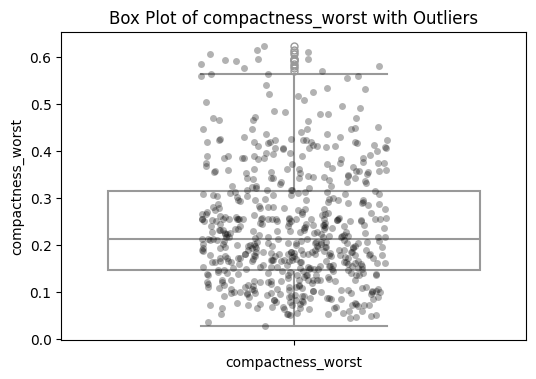

Outliers detected in concavity_worst.


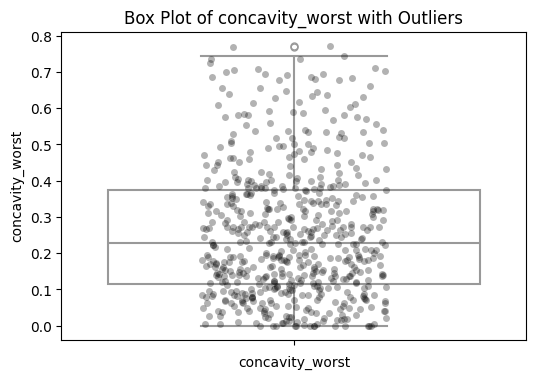

Outliers detected in symmetry_worst.


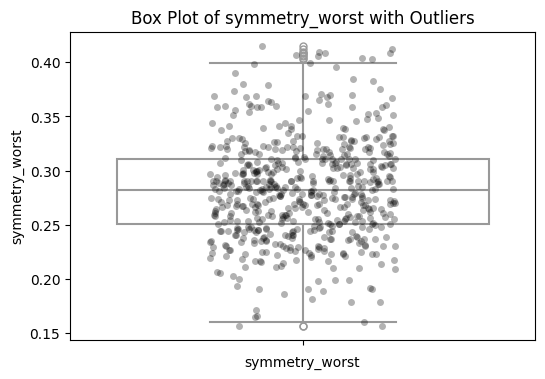

Outliers detected in fractal_dimension_worst.


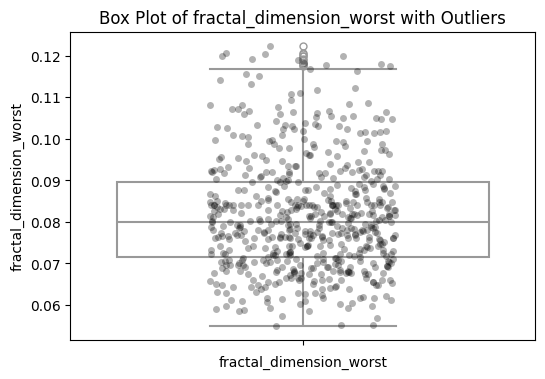

Descriptive Statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     13.871672     19.119961       90.275180   610.265602   
std       3.099251      4.003561       21.398984   267.633718   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.460000     21.600000      102.400000   710.600000   
max      21.750000     29.970000      147.300000  1326.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096005          0.099727        0.080812             0.046696   
std           0.013126          0.044540        0.064907             0.034857   
min           0.062510          0.019380        0.000000          

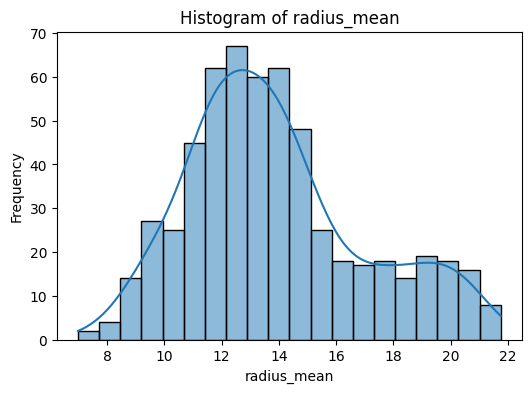

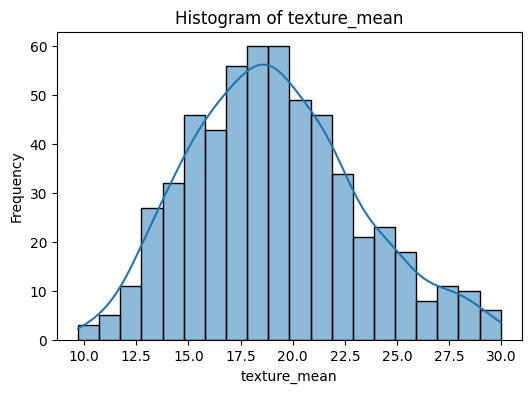

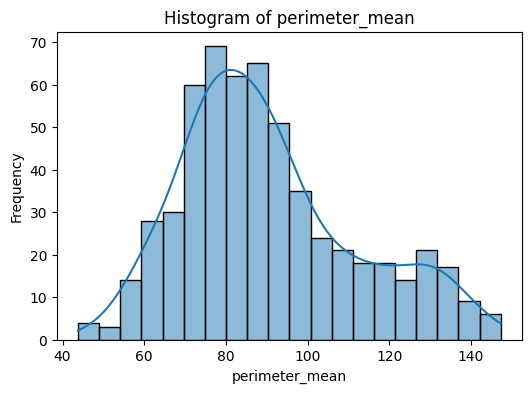

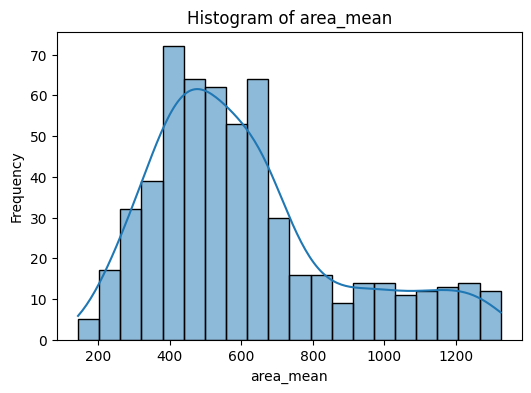

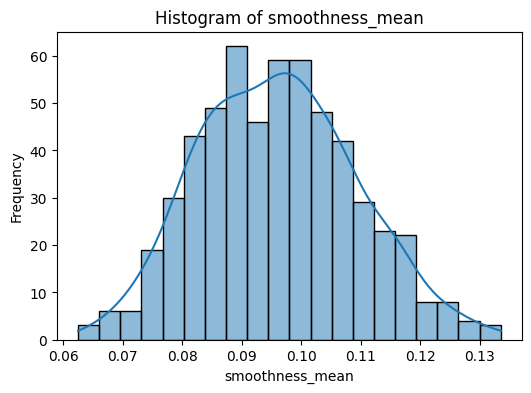

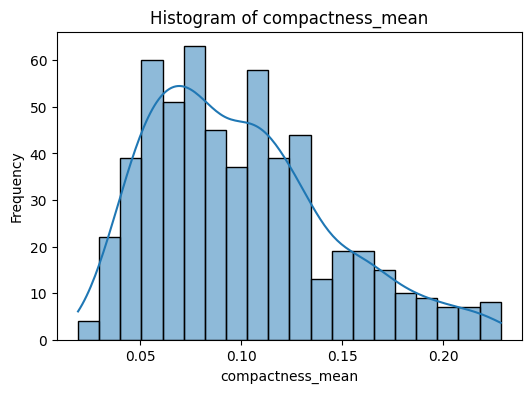

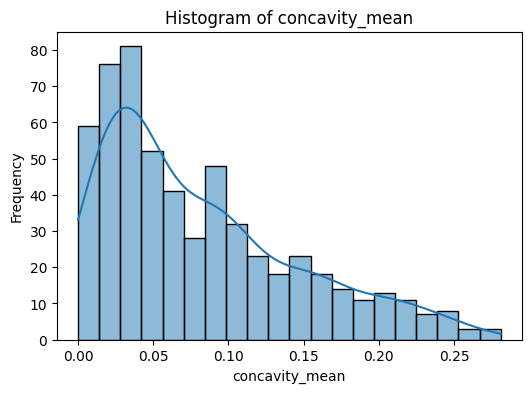

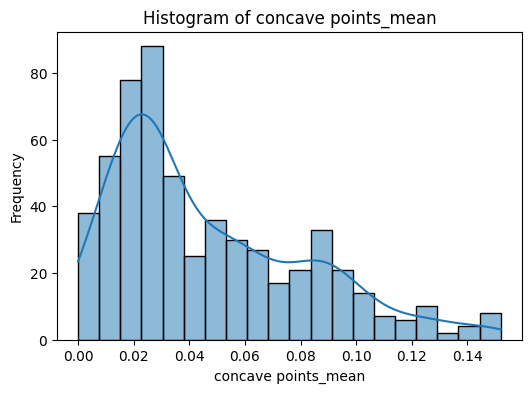

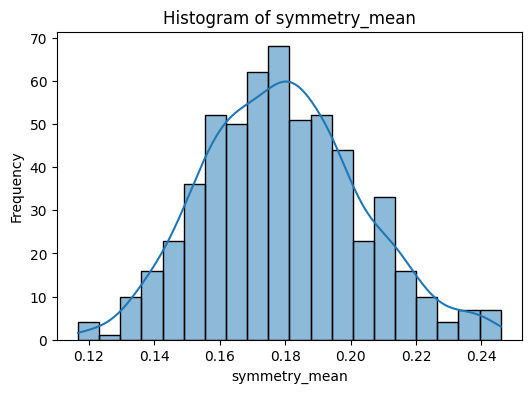

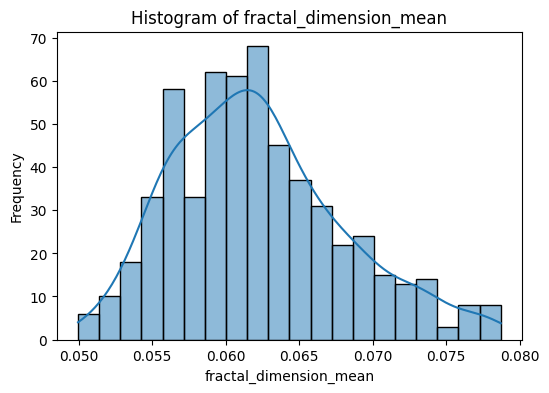

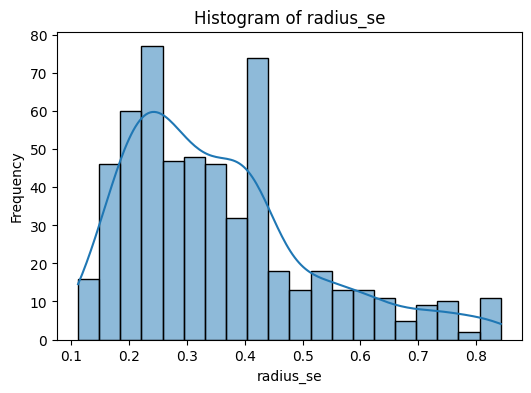

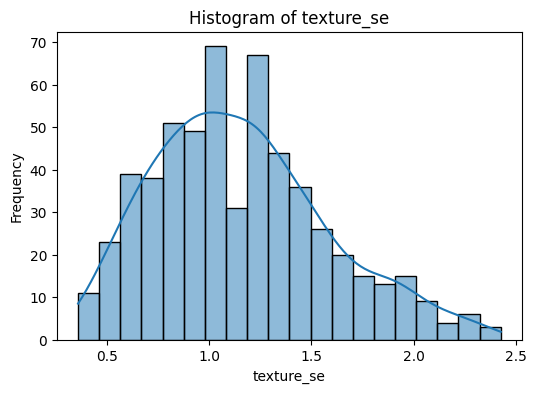

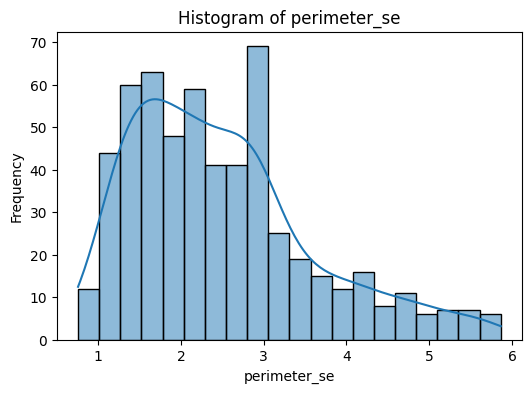

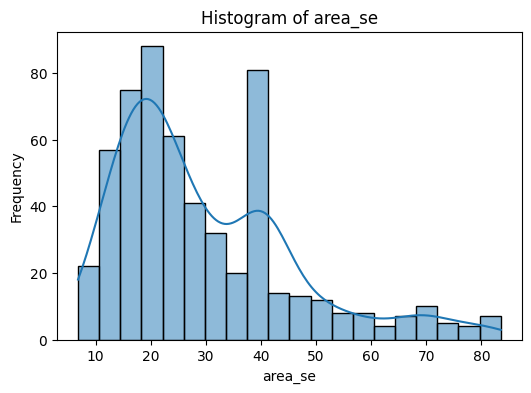

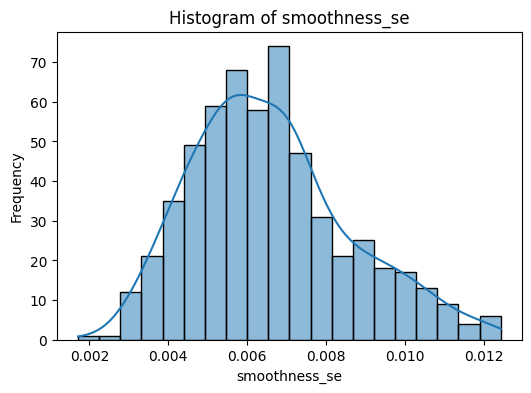

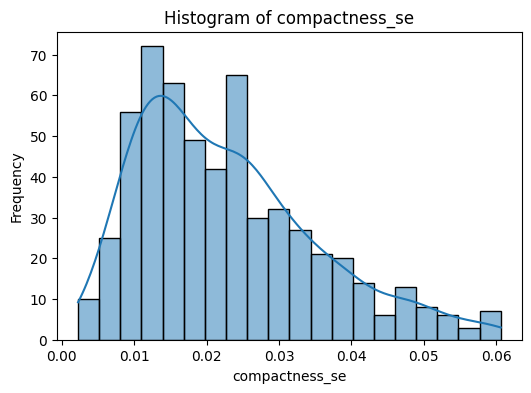

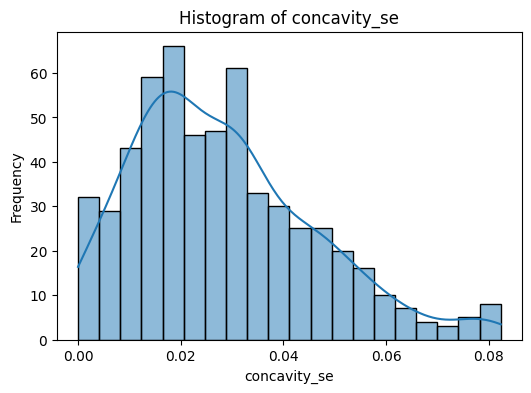

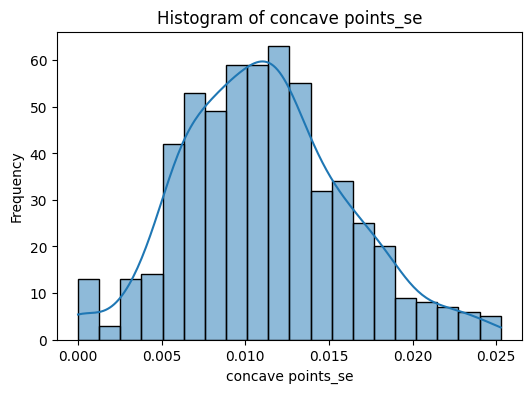

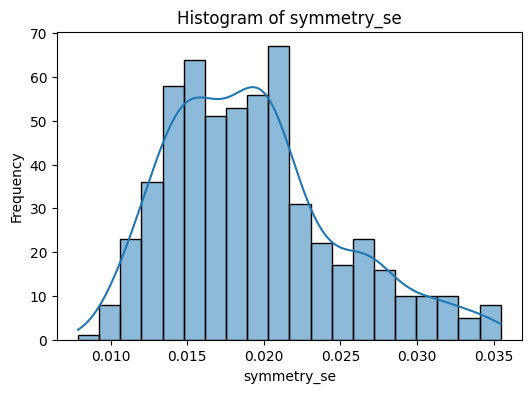

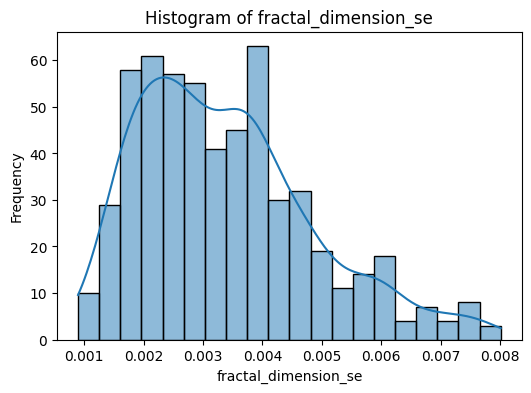

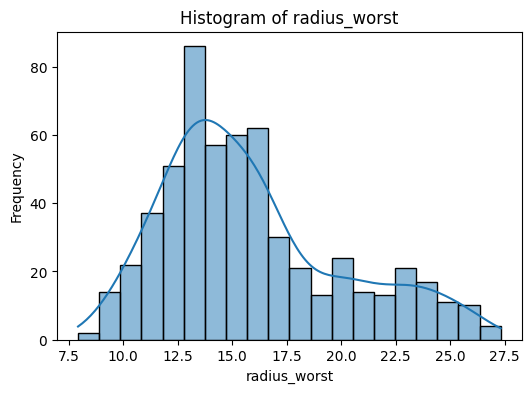

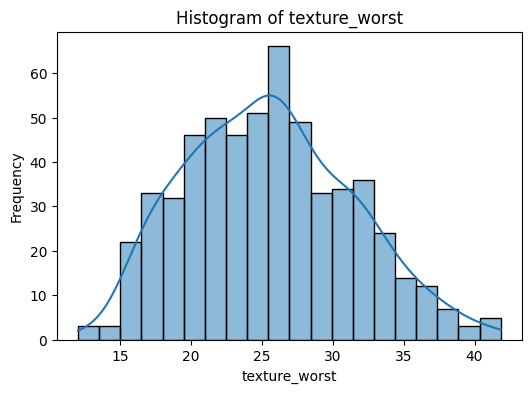

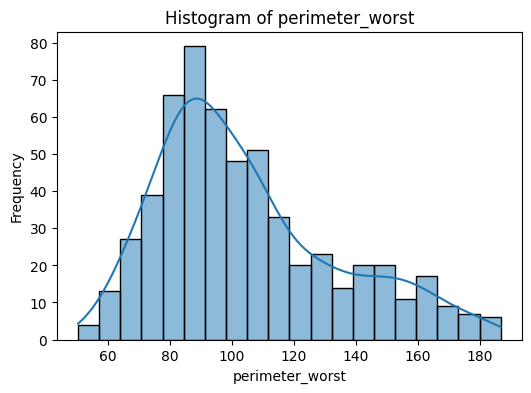

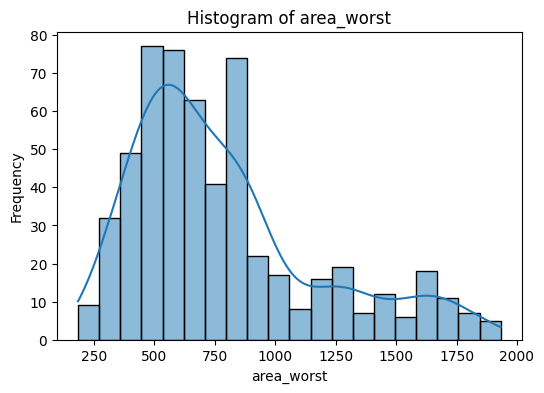

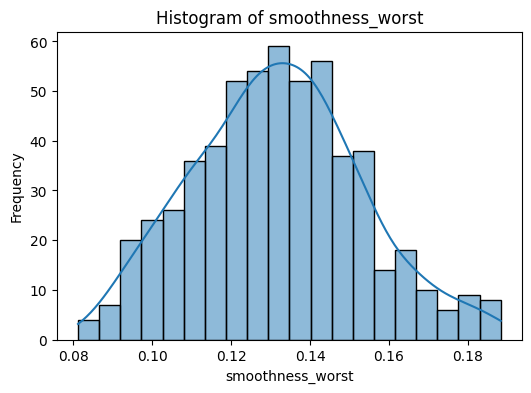

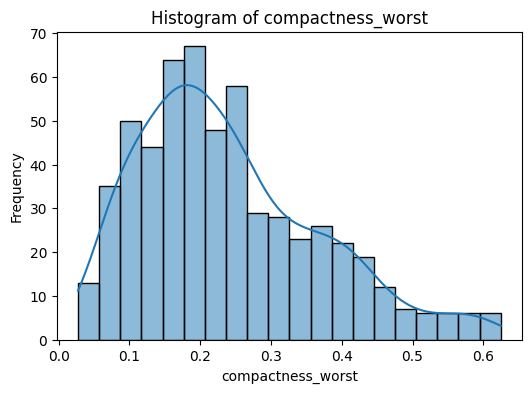

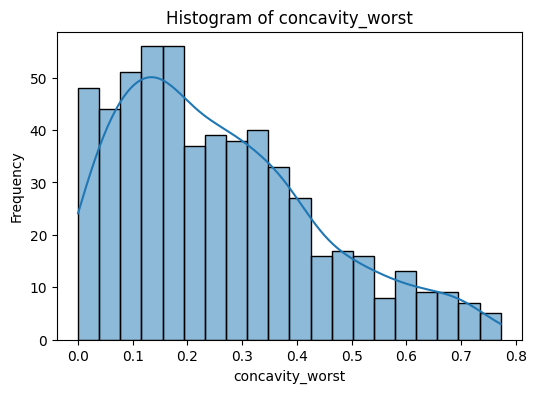

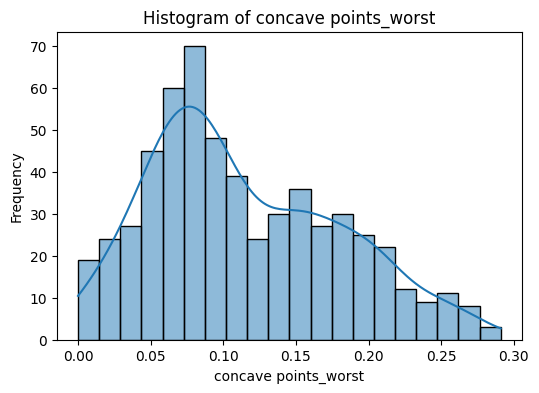

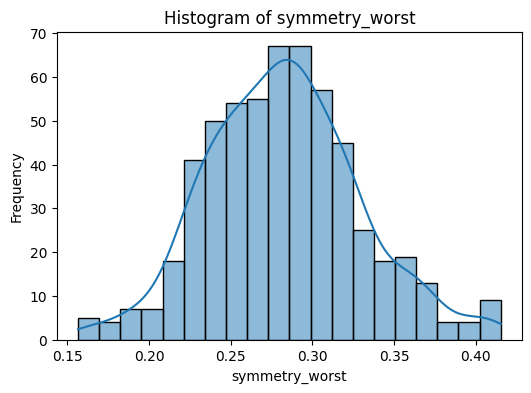

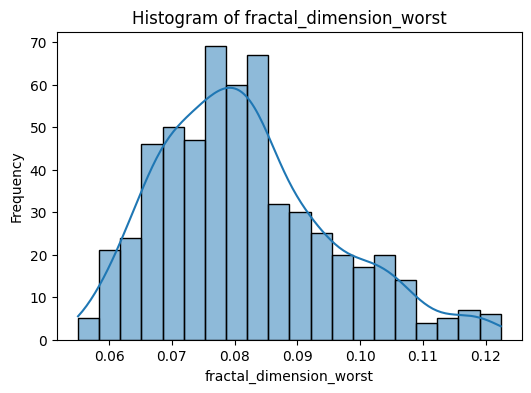


Bar Charts:


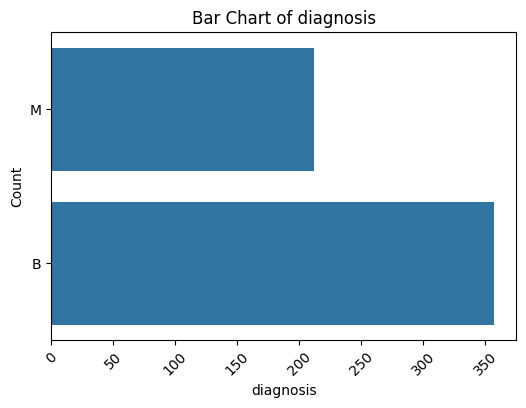


Box Plots:


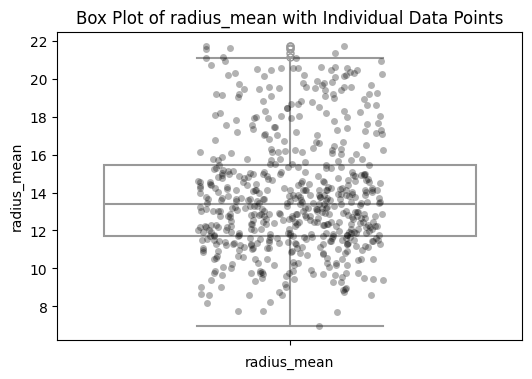

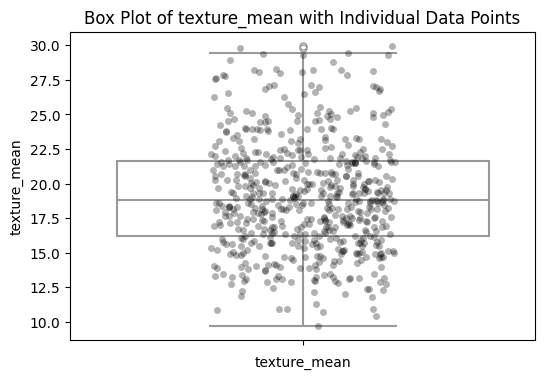

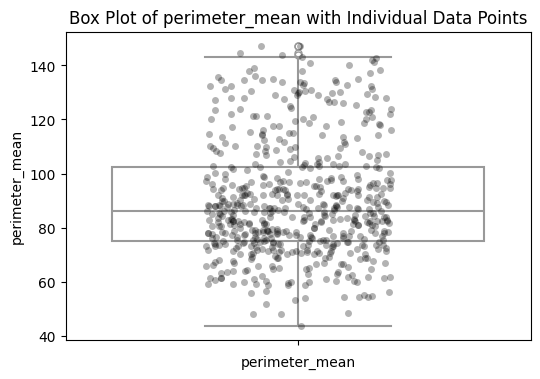

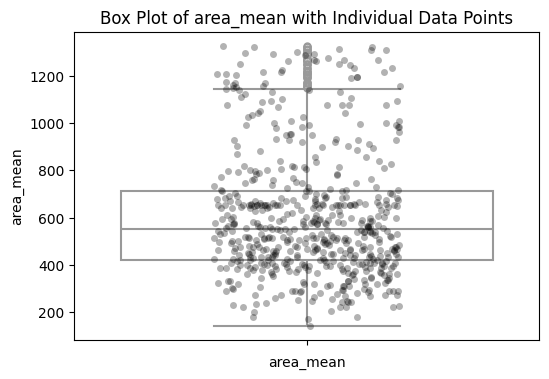

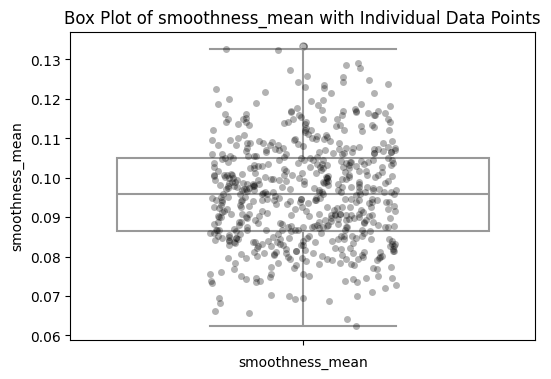

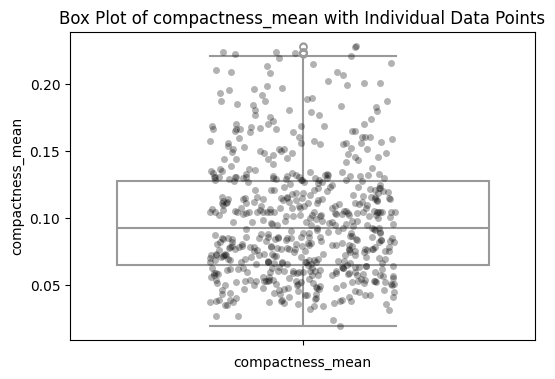

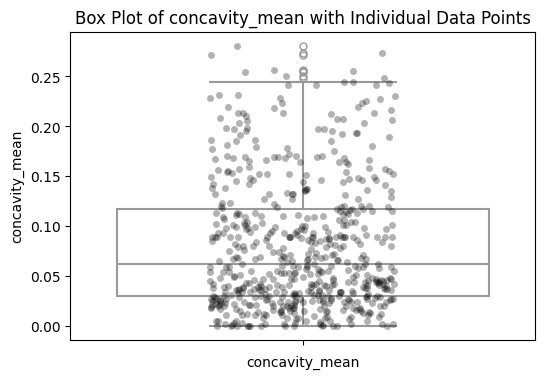

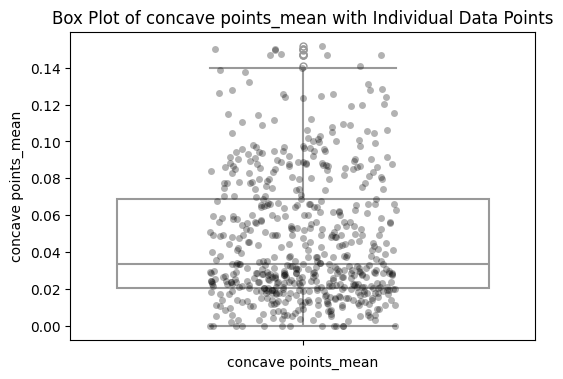

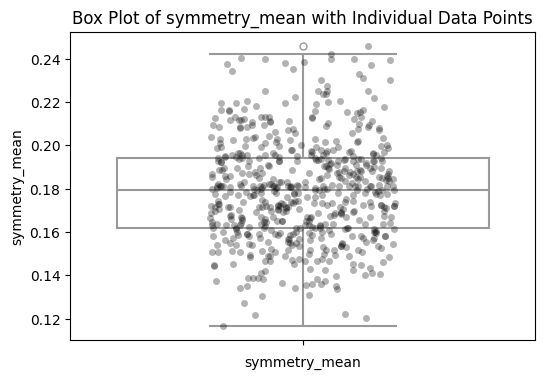

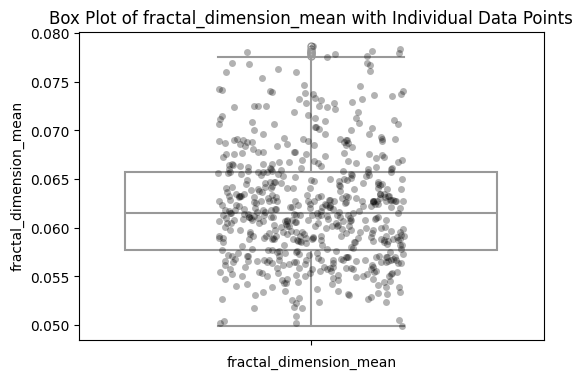

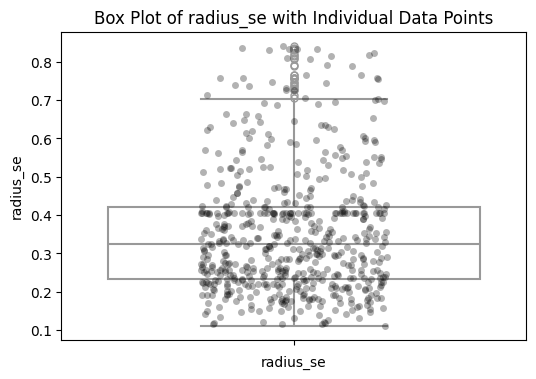

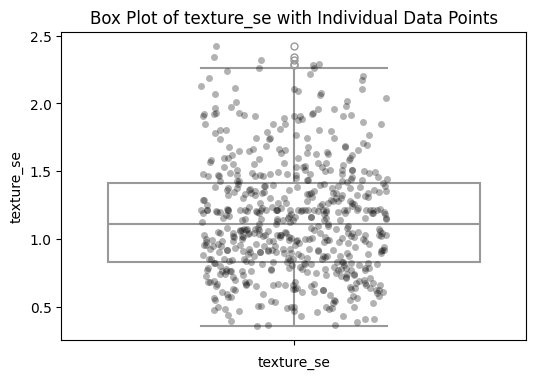

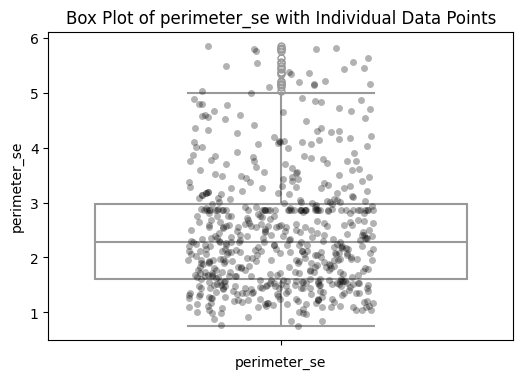

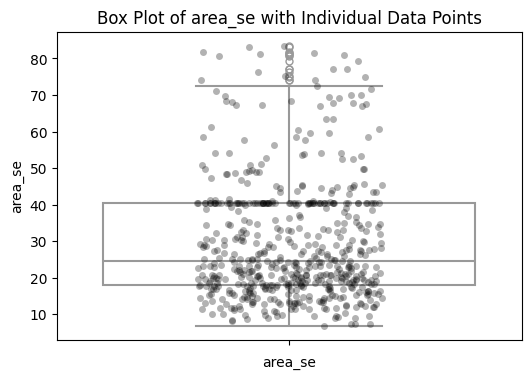

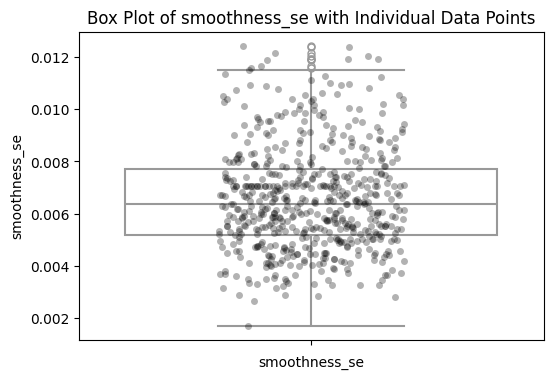

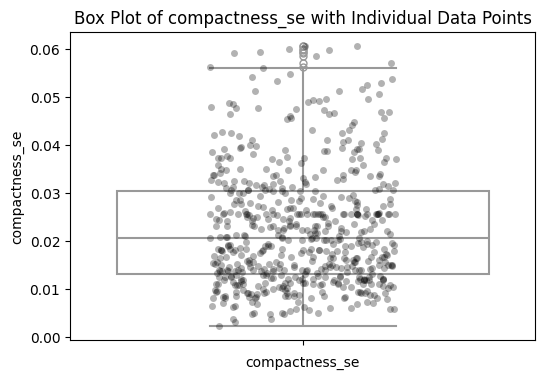

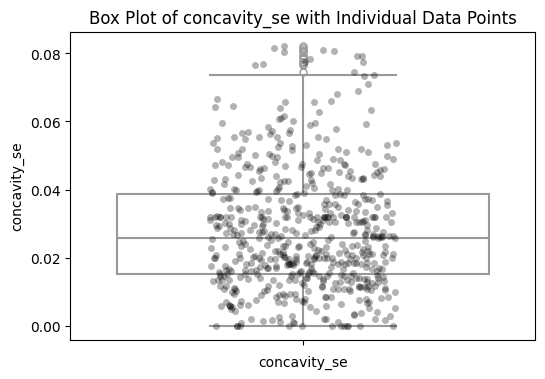

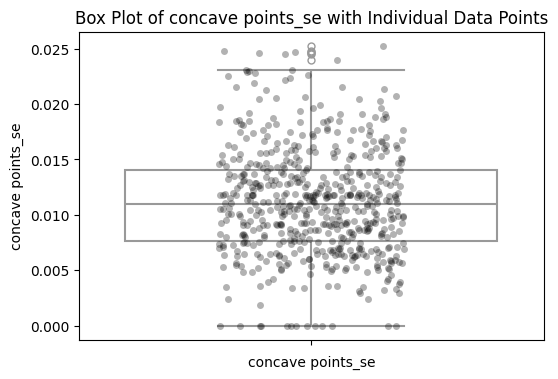

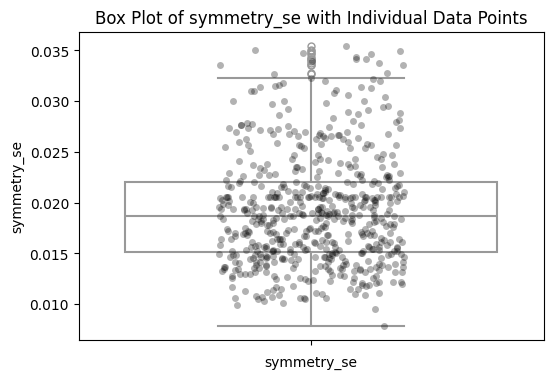

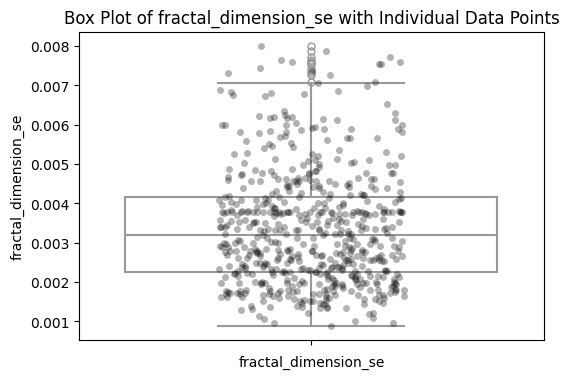

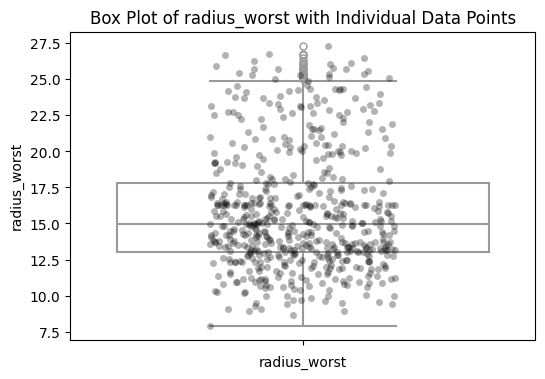

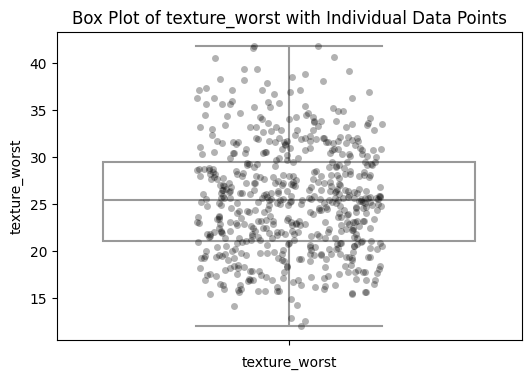

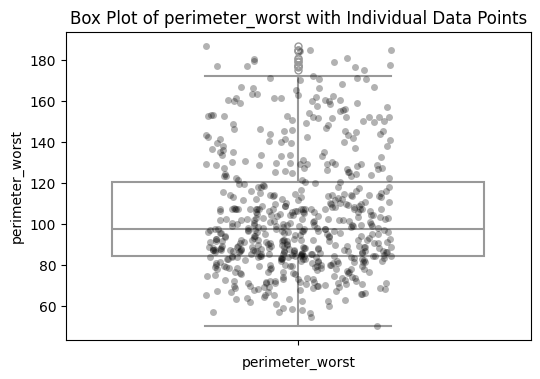

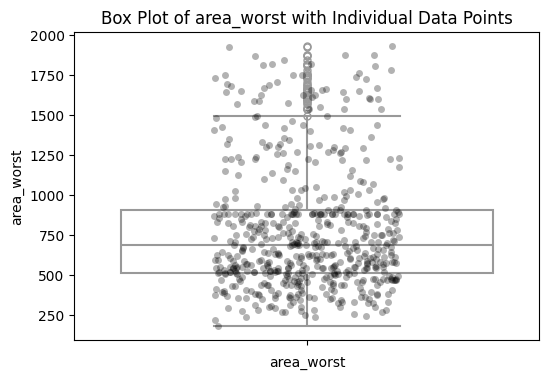

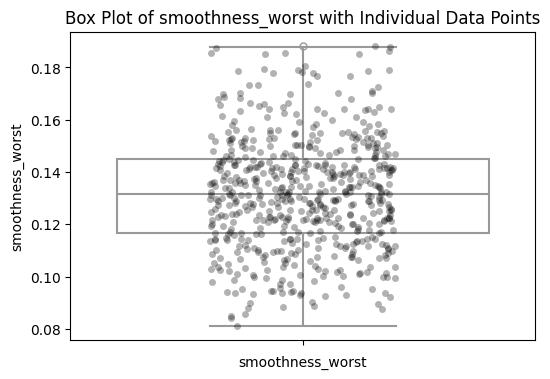

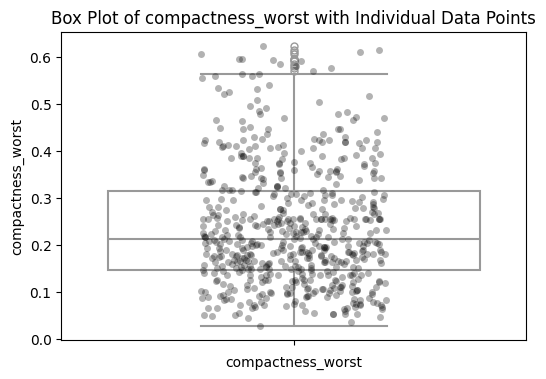

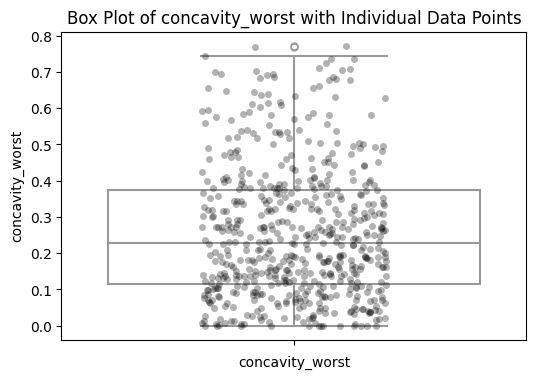

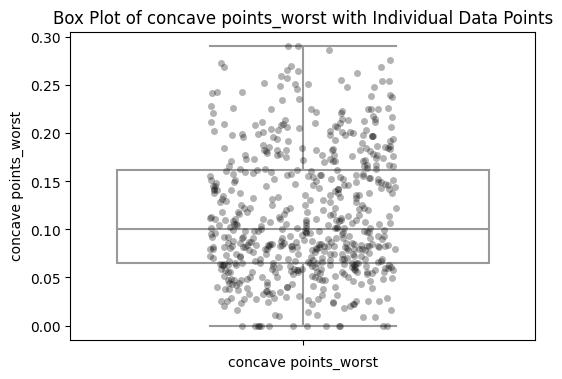

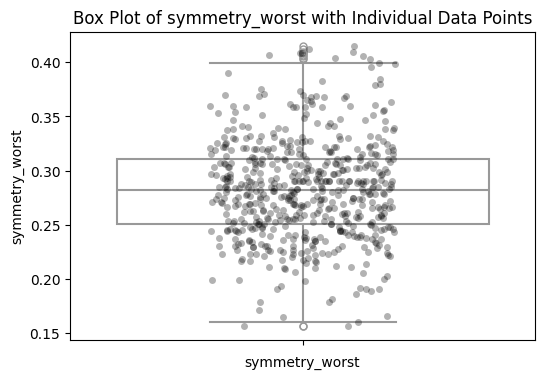

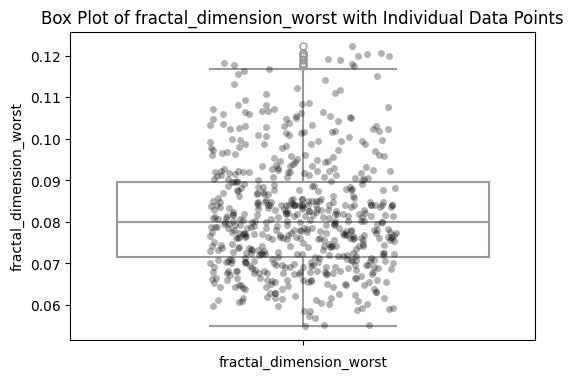

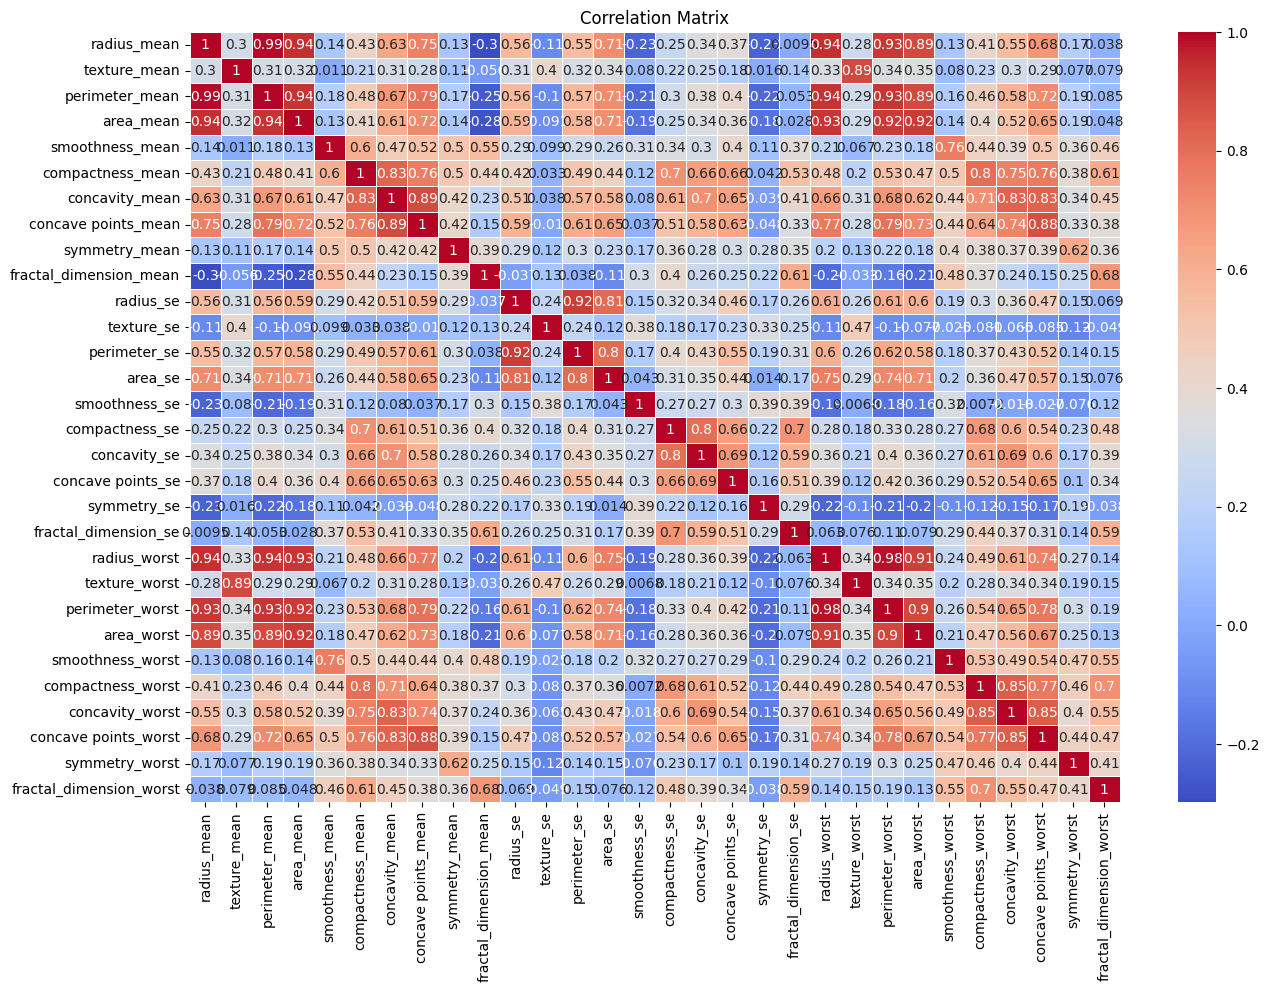

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840          0.104341        0.088799              0.14710   
1          0.08474          0.078640        0.086900              0.07017   
2          0.10960          0.159900        0.197400              0.12790   
3          0.09636          0.104341        0.241400              0.10520   
4          0.10030          0.132800        0.198000              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.241900  ...         25.38          17.33 

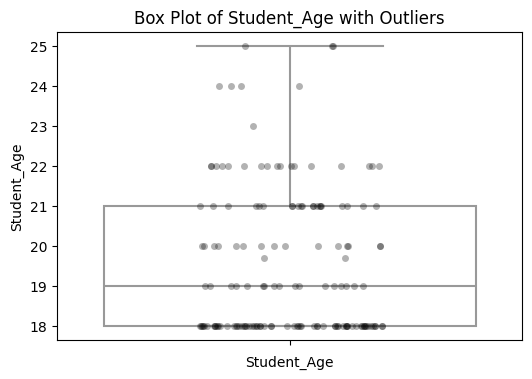

Outliers detected in Weekly_Study_Hours.


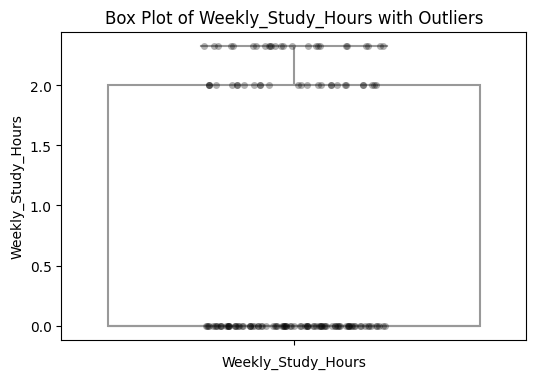

Descriptive Statistics:
       Student_Age  Weekly_Study_Hours
count   145.000000          145.000000
mean     19.595624            0.774316
std       1.845586            1.043851
min      18.000000            0.000000
25%      18.000000            0.000000
50%      19.000000            0.000000
75%      21.000000            2.000000
max      25.000000            2.331034

Histograms:


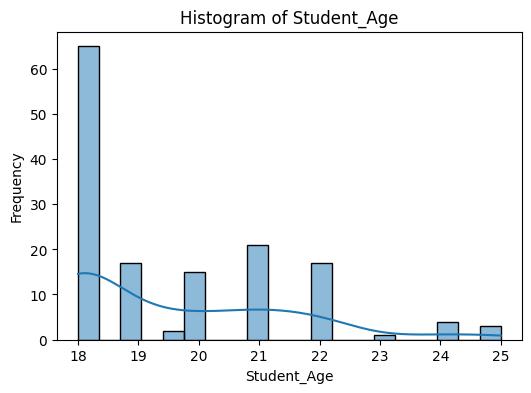

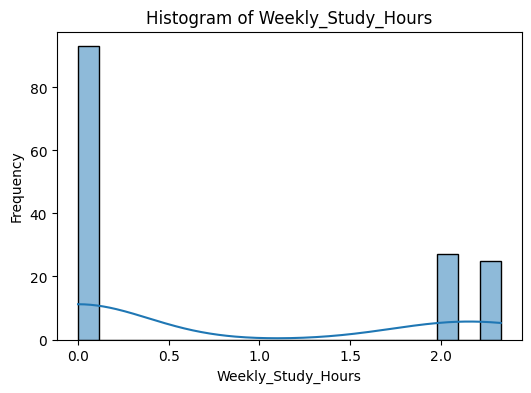


Bar Charts:


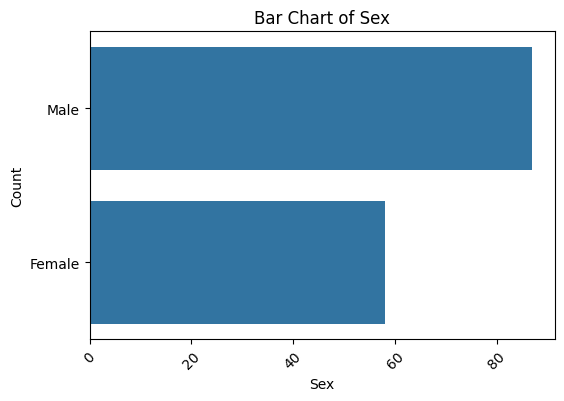

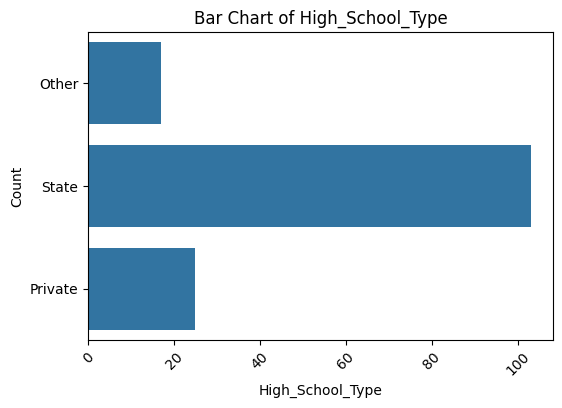

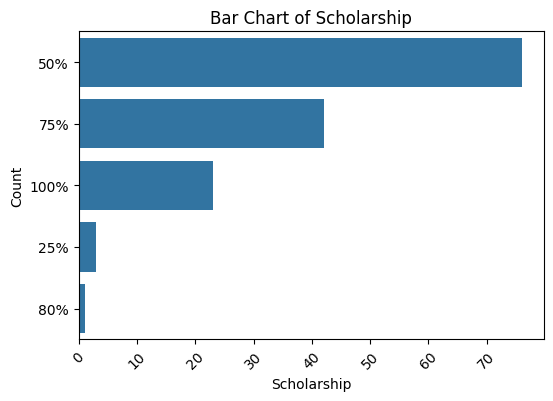

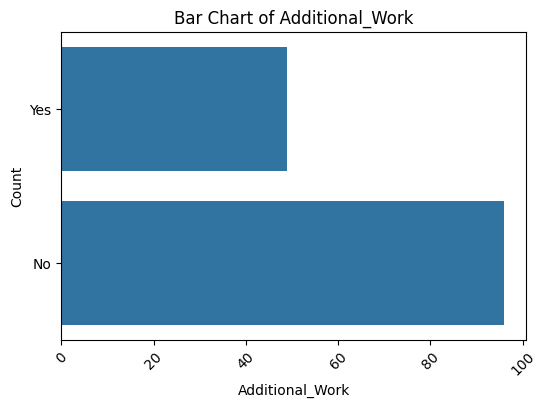

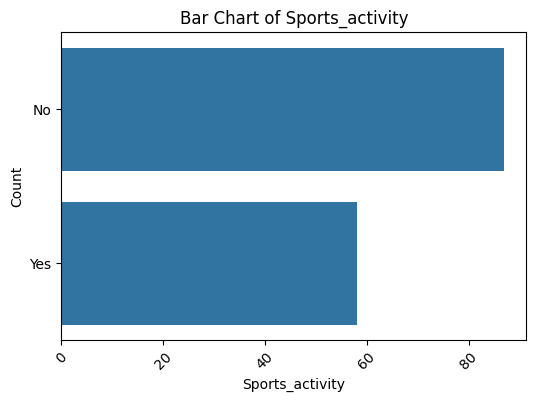

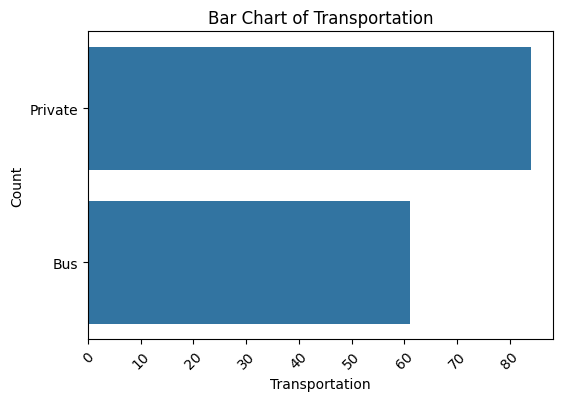

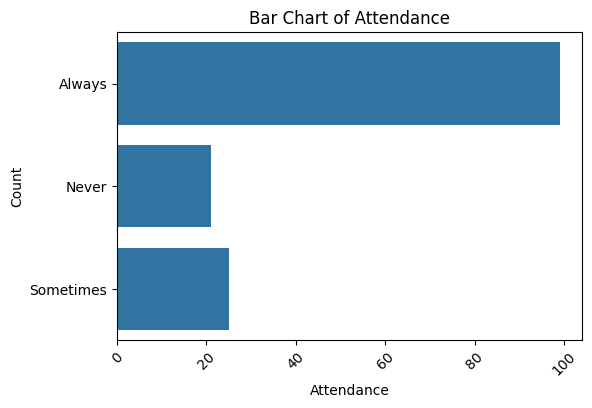

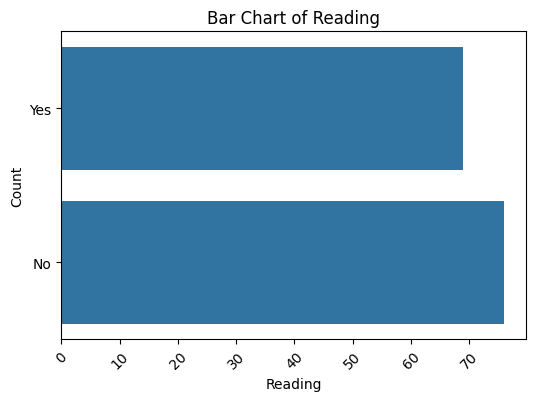

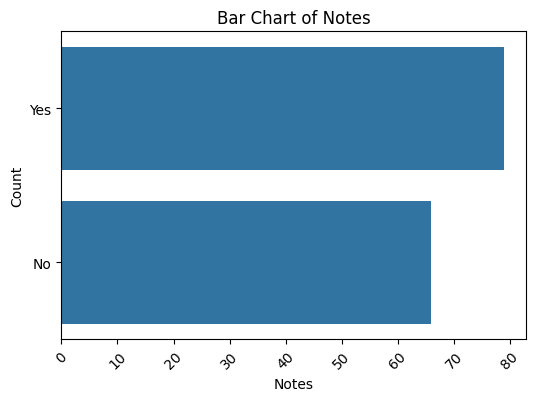

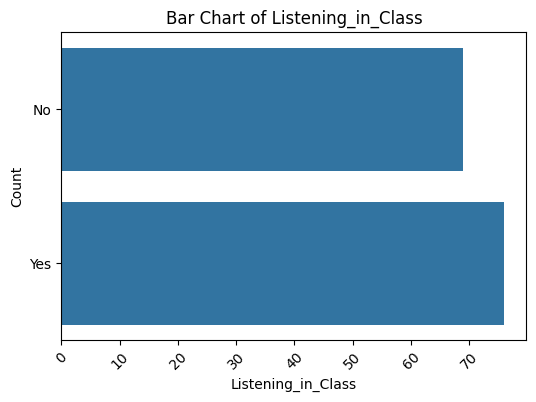

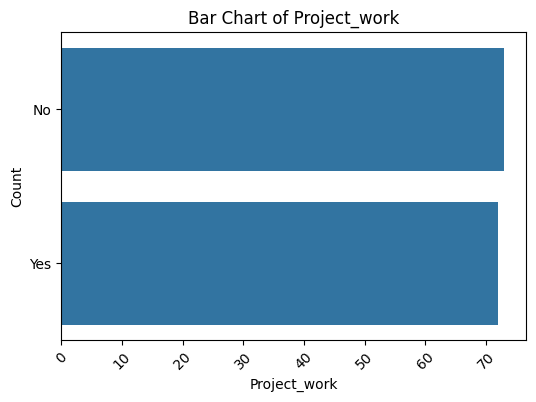

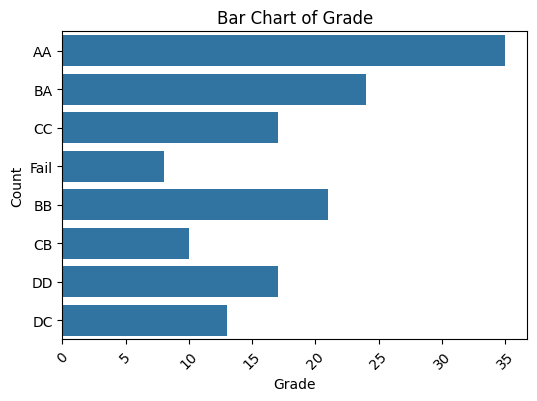


Box Plots:


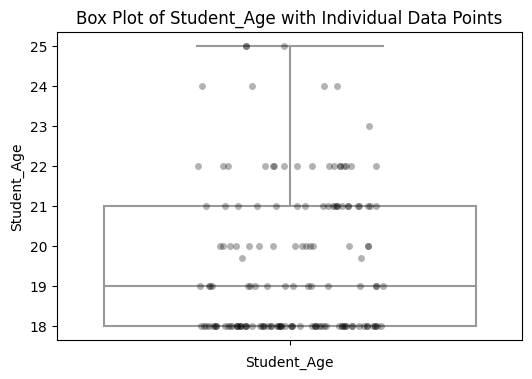

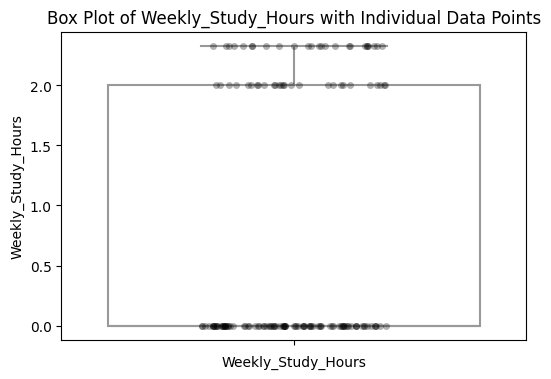

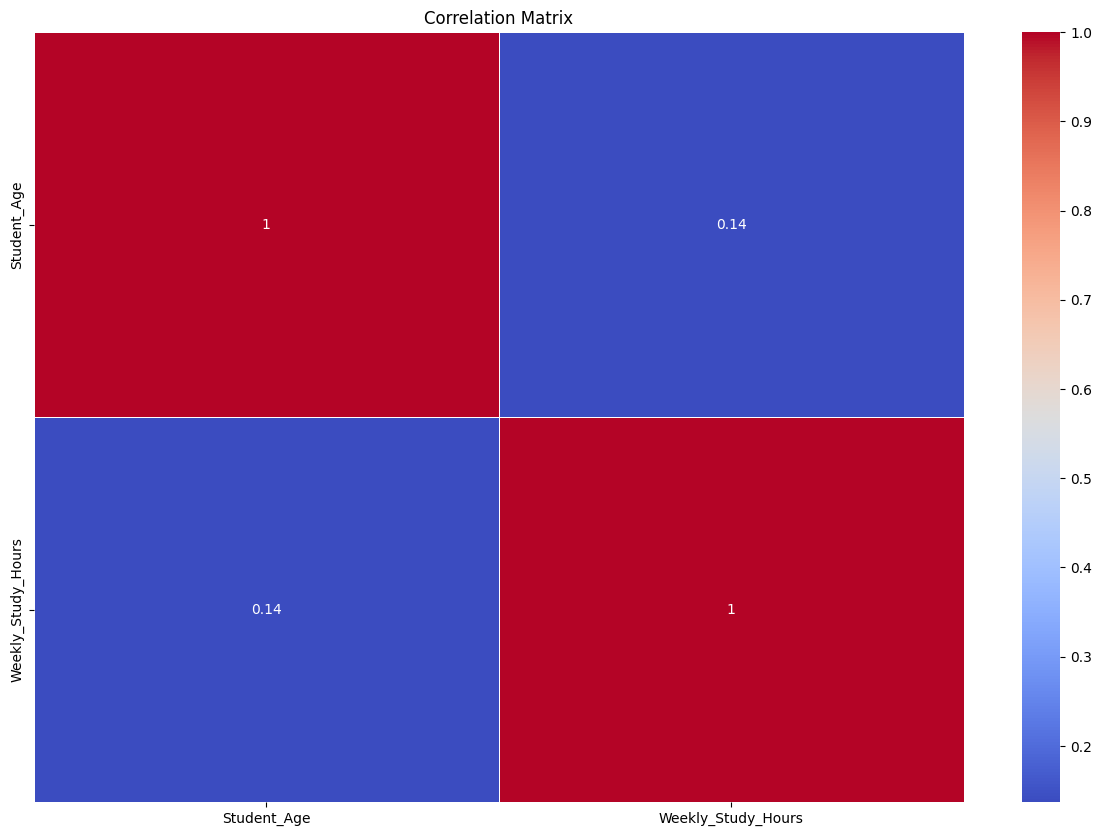

   Student_Age     Sex High_School_Type Scholarship Additional_Work  \
0         21.0    Male            Other         50%             Yes   
1         20.0    Male            Other         50%             Yes   
2         21.0    Male            State         50%              No   
3         18.0  Female          Private         50%             Yes   
4         22.0    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private            0.000000     Always     Yes   Yes   
1              No        Private            0.000000     Always     Yes    No   
2              No        Private            2.000000      Never      No    No   
3              No            Bus            2.000000     Always      No   Yes   
4              No            Bus            2.331034     Always     Yes    No   

  Listening_in_Class Project_work Grade  
0                 No           No    AA  
1 

In [22]:

# Load Data Function
def loadData(file_path):
    df = pd.read_csv(file_path)
    return df

# Clean Data Function
def cleaningData(df, drop_columns=None):
    # Check duplicates records
    duplicate = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate}")

    if duplicate > 0:
        df = df.drop_duplicates()
        print("Duplicate rows have been dropped.")
    
    if drop_columns:
        df = df.drop(columns=[col for col in drop_columns if col in df.columns], axis=1)
        print(f"Dropped columns: {drop_columns}")

    if 'Total Charges' in df.columns:
        df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


    return df

# Handle Missing Values Function
def handleMissingValues(df, strategy='mean', columns=None):
    if df.isnull().values.any():
        numeric_cols = df.select_dtypes(include='number').columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
        print("Handled missing values.")
    else:
        print("No missing values found.")

    return df

# Function for Data Visualization
def EDA(data):
    # Statistics description like (mean, mode, median)
    print("Descriptive Statistics:")
    print(data.describe())
    
    # Histograms for numeric data
    print("\nHistograms:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    
    # Bar charts for categorical data and object type data
    print("\nBar Charts:")
    for column in data.columns:
        if isinstance(data[column].dtype, pd.CategoricalDtype):  # if categorical
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif data[column].dtype == 'object':  # object dtype for categorical variables
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
    
    # Identify Outlier using Box Plot
    print("\nBox Plots:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.boxplot(data[column], color='white', fliersize=5, linewidth=1.5)
        sns.stripplot(data[column], color='black', jitter=0.2, alpha=0.3)
        plt.title(f'Box Plot of {column} with Individual Data Points')
        plt.xlabel(column)
        plt.show()
    
    # Correlation matrix
    if data.select_dtypes(include='number').shape[1] > 1:
        corr_matrix = data.select_dtypes(include='number').corr()
        plt.figure(figsize=(15, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()
    else:
        print("Cannot generate correlation matrix: Insufficient numeric columns.")

    return data

# Outlier Detection and Handling Outlier Using Mean
def detectOutliers(df):
    outlier_columns = []
    
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            outlier_columns.append(column)
            print(f"Outliers detected in {column}.")
            df[column] = df[column].apply(lambda x: df[column].mean() if x < lower_bound or x > upper_bound else x)
            
            # Plot box plot for the column with outliers
            plt.figure(figsize=(6, 4))
            sns.boxplot(df[column], color='white', fliersize=5, linewidth=1.5)
            sns.stripplot(df[column], color='black', jitter=0.2, alpha=0.3)
            plt.title(f'Box Plot of {column} with Outliers')
            plt.xlabel(column)
            plt.show()
    
    if not outlier_columns:
        print("No outliers detected in any numeric columns.")
    
    return df

# Master Function where all above functions are called
def masterFunction(file_path, drop_columns=None,handleOutliers=True):
    df = loadData(file_path)
    df = cleaningData(df, drop_columns=drop_columns)
    df = handleMissingValues(df)
    df = detectOutliers(df)
    if handleOutliers:
        df = detectOutliers(df)
    
    df= EDA(df)
    return df

# Dataset Assignments to Variables
df_1 = r'C:\Users\DS\Downloads\CustomerChurn.csv'
df_2 = r'C:\Users\DS\Downloads\Cancer_Data.csv'
df_3 = r'C:\Users\DS\Downloads\student.csv'

# Unnecessary Columns to Drop in Cleaning Function
drop_columns_df_1 = ['LoyaltyID', 'Customer ID']
drop_columns_df_2 = ['id'] 
drop_columns_df_3 = ['Id']  

# Calling Master Function for Each Dataset
print("\nProcessed Data for Customer Churn:")
data_1 = masterFunction(df_1, drop_columns=drop_columns_df_1)
print(data_1.head())

print("\nProcessed Data for Breast Cancer:")
data_2 = masterFunction(df_2, drop_columns=drop_columns_df_2,handleOutliers=False)
print(data_2.head())

print("\nProcessed Data for Student Performance:")
data_3 = masterFunction(df_3, drop_columns=drop_columns_df_3,handleOutliers=False)
print(data_3.head())
